In [1]:
import kagglehub
path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")
print("path to dataset files: ", path)

path to dataset files:  /kaggle/input/global-ai-job-market-and-salary-trends-2025


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(path + "/ai_job_dataset.csv")

In [3]:
# Data Overview
data.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
# Information About 15,000+ job listings from 50+ countries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [5]:
# Shape of Data
data.shape

(15000, 19)

In [6]:
# Descriptive Analysis
data.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [7]:
data['company_location'] = data['company_location'].replace('Israel', 'Palestine')
data['employee_residence'] = data['employee_residence'].replace('Israel', 'Palestine')

In [8]:
# Check Duplicates
data.duplicated().sum()

np.int64(0)

In [9]:
# Check Null
data.isna().sum()

,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0


In [10]:
# Drop Job_description_length
data.drop(['job_description_length'], axis=1, inplace=True)

In [11]:
# Most 5 Frequently Posted Job Titles
data.job_title.value_counts().reset_index().head()

,job_title,count
0,Machine Learning Researcher,808
1,AI Software Engineer,784
2,Autonomous Systems Engineer,777
3,Machine Learning Engineer,772
4,AI Architect,771


In [12]:
# Distribution of Salary Currencies
data.salary_currency.value_counts().reset_index()

,salary_currency,count
0,USD,11957
1,EUR,2314
2,GBP,729


In [13]:
# Number of Jobs by Experience Level
data.experience_level.value_counts().reset_index()

,experience_level,count
0,MI,3781
1,EX,3760
2,SE,3741
3,EN,3718


In [14]:
# Number of Jobs by Employment Type
data.employment_type.value_counts().reset_index()

,employment_type,count
0,FT,3812
1,FL,3758
2,CT,3721
3,PT,3709


In [15]:
# Number of Jobs by Education Required
data.education_required.value_counts().reset_index()

,education_required,count
0,Bachelor,3789
1,Associate,3785
2,Master,3748
3,PhD,3678


In [16]:
# Most 10 Frequently Posted Company Locations
data.company_location.value_counts().reset_index().head(10)

,company_location,count
0,Germany,814
1,Denmark,778
2,Canada,769
3,France,769
4,Austria,765
5,Singapore,764
6,China,763
7,India,754
8,Sweden,752
9,Palestine,751


In [17]:
# Number of Jobs by Company Size
data.company_size.value_counts().reset_index()

,company_size,count
0,S,5007
1,L,4998
2,M,4995


In [18]:
# Top 5 Countries by Number of Employees
data.employee_residence.value_counts().reset_index().head()

,employee_residence,count
0,Sweden,790
1,France,781
2,Denmark,777
3,Austria,776
4,India,772


In [19]:
# Top 10 Required Skills
top_skills = data['required_skills'].str.split(", ").explode().value_counts().head(10)
top_skills

,count
required_skills,
Python,4450
SQL,3407
TensorFlow,3022
Kubernetes,3009
Scala,2794
PyTorch,2777
Linux,2705
Git,2631
Java,2578


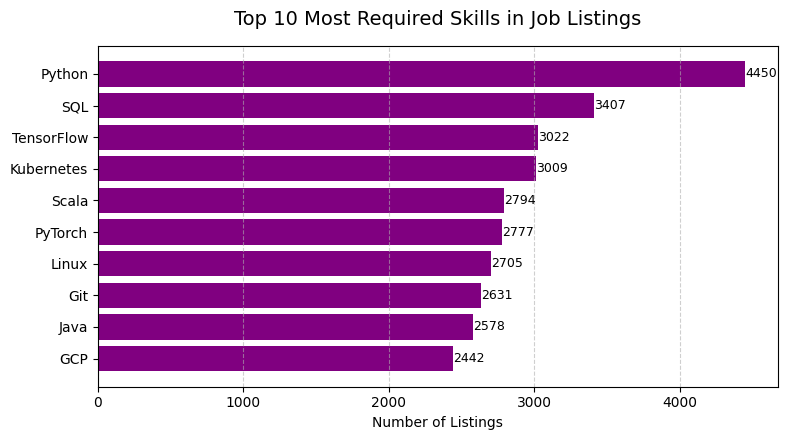

In [20]:
# Plot top 10 required skills
plt.figure(figsize=(8, 4.5))
plt.barh(top_skills.index[::-1], top_skills.values[::-1], color='purple')

plt.xlabel('Number of Listings')
plt.title('Top 10 Most Required Skills in Job Listings', fontsize=14, pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.6)

for i, value in enumerate(top_skills.values[::-1]):
    plt.text(value + 1, i, str(value), va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [21]:
# Top 10 Years of Experiences needed
data.years_experience.value_counts().reset_index().head(10)

,years_experience,count
0,0,1890
1,1,1828
2,4,1295
3,3,1247
4,2,1239
5,7,769
6,5,757
7,6,753
8,9,742
9,8,720


In [22]:
# Top 10 Companies who Posted Jobs
data.company_name.value_counts().reset_index().head(10)

,company_name,count
0,TechCorp Inc,980
1,Cognitive Computing,972
2,AI Innovations,964
3,Digital Transformation LLC,961
4,Quantum Computing Inc,960
5,Future Systems,960
6,Cloud AI Solutions,951
7,Predictive Systems,947
8,Smart Analytics,927
9,Advanced Robotics,925


In [23]:
# Top 10 Industries
data.industry.value_counts().reset_index().head(10)

,industry,count
0,Retail,1063
1,Media,1045
2,Automotive,1020
3,Consulting,1020
4,Technology,1011
5,Real Estate,1007
6,Government,998
7,Transportation,997
8,Telecommunications,997
9,Healthcare,997


In [24]:
# Currently Open Jobs (Based on Application Deadlines)
import pandas as pd

today_date = pd.to_datetime('today')

data['posting_date'] = pd.to_datetime(data['posting_date'], errors='coerce')
data['application_deadline'] = pd.to_datetime(data['application_deadline'], errors='coerce')

available_jobs = data[data['application_deadline'] >= today_date]
available_jobs.head(3)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,benefits_score,company_name
395,AI00396,Research Scientist,62031,USD,MI,FL,Ireland,S,United Kingdom,50,"MLOps, Linux, Computer Vision, Git",PhD,4,Healthcare,2025-04-25,2025-06-28,8.3,Cognitive Computing
405,AI00406,Principal Data Scientist,85361,EUR,MI,PT,Germany,L,Germany,50,"Statistics, Mathematics, SQL, TensorFlow",PhD,2,Technology,2025-04-21,2025-06-27,6.0,Machine Intelligence Group
452,AI00453,Data Engineer,160302,USD,EX,PT,Norway,S,Norway,0,"Mathematics, Scala, NLP, SQL",PhD,11,Retail,2025-04-18,2025-06-28,9.7,Advanced Robotics


In [25]:
# Top-Paying Job Titles with Average Salary and Currency (Based on Available Jobs)

# Get first currency used per job title
currency_per_title = available_jobs.groupby('job_title')['salary_currency'].first().reset_index()

# Get average salary (USD) per job title
avg_sal_available = available_jobs.groupby('job_title')['salary_usd'].mean().round().reset_index()

# Merge both into one DataFrame
top_paying_jobs_df = pd.merge(avg_sal_available, currency_per_title, on='job_title')

# Rename columns for clarity
top_paying_jobs_df.columns = ['Job_Title', 'Average_Salary_USD', 'Currency']

# Sort by highest average salary
top_paying_jobs_df = top_paying_jobs_df.sort_values(by='Average_Salary_USD', ascending=False).reset_index(drop=True)

top_paying_jobs_df.head(10)

,Job_Title,Average_Salary_USD,Currency
0,Deep Learning Engineer,192402.0,USD
1,AI Consultant,157084.0,USD
2,Data Scientist,156157.0,USD
3,Data Analyst,149086.0,EUR
4,ML Ops Engineer,142316.0,USD
5,AI Product Manager,132535.0,USD
6,Head of AI,123739.0,EUR
7,Data Engineer,115158.0,USD
8,Machine Learning Researcher,111127.0,USD
9,Autonomous Systems Engineer,107770.0,USD


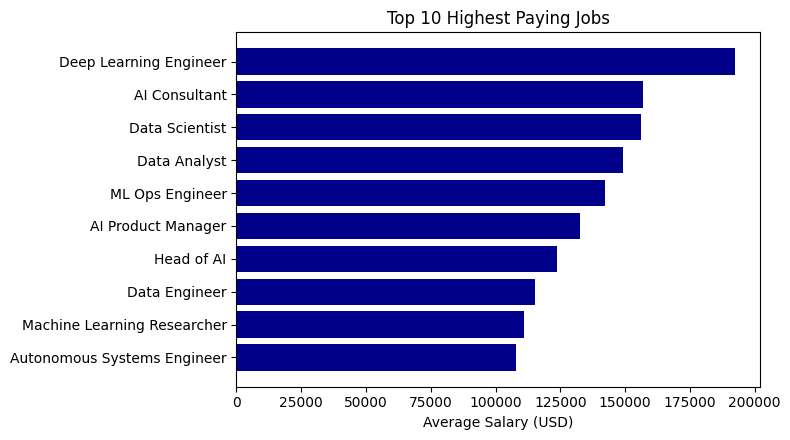

In [26]:
# Select top  highest-paying jobs
top_10 = top_paying_jobs_df.head(10)

# Plot
plt.figure(figsize=(8, 4.5))
plt.barh(top_10['Job_Title'], top_10['Average_Salary_USD'], color='darkblue')
plt.xlabel('Average Salary (USD)')
plt.title('Top 10 Highest Paying Jobs')
plt.gca().invert_yaxis()  # Highest salary at top
plt.tight_layout()
plt.show()

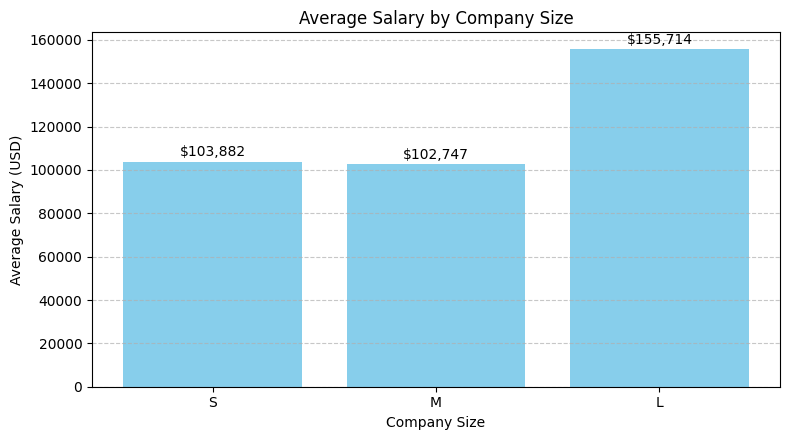

In [27]:
# Average Salary (USD) by Company Size – Small (S), Medium (M), Large (L)
avg_sal_companysize = available_jobs.groupby('company_size')['salary_usd'].mean().round().reset_index()

size_order = ['S', 'M', 'L']
avg_sal_companysize = avg_sal_companysize.set_index('company_size').loc[size_order].reset_index()

plt.figure(figsize=(8, 4.5))
plt.bar(avg_sal_companysize['company_size'], avg_sal_companysize['salary_usd'], color='skyblue')

plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Size')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(avg_sal_companysize['salary_usd']):
    plt.text(i, value + 1000, f"${int(value):,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [28]:
# Top 5 Job Titles by Average Salary Across Remote, Onsite, and Hybrid Work Modes
onsite_jobs = available_jobs[available_jobs['remote_ratio'] == 0]
hybrid_jobs = available_jobs[available_jobs['remote_ratio'] == 50]
remote_jobs = available_jobs[available_jobs['remote_ratio'] == 100]

avg_sal_onsite = onsite_jobs.groupby('job_title')['salary_usd'].mean().round()
avg_sal_hybrid = hybrid_jobs.groupby('job_title')['salary_usd'].mean().round()
avg_sal_remote = remote_jobs.groupby('job_title')['salary_usd'].mean().round()

remote_sal_df = pd.DataFrame({
    'Average_Remote': avg_sal_remote,
    'Average_Onsite': avg_sal_onsite,
    'Average_Hybrid': avg_sal_hybrid
})

remote_sal_df = remote_sal_df.sort_values(by=['Average_Remote','Average_Onsite', 'Average_Hybrid'], ascending=False)

remote_sal_df = remote_sal_df.reset_index().fillna(0)
remote_sal_df.head()

,job_title,Average_Remote,Average_Onsite,Average_Hybrid
0,Deep Learning Engineer,339204.0,69867.0,168134.0
1,AI Consultant,198198.0,102930.0,196203.0
2,Data Analyst,179981.0,162364.0,47461.0
3,NLP Engineer,155480.0,60113.0,37306.0
4,Machine Learning Researcher,133005.0,49406.0,130397.0


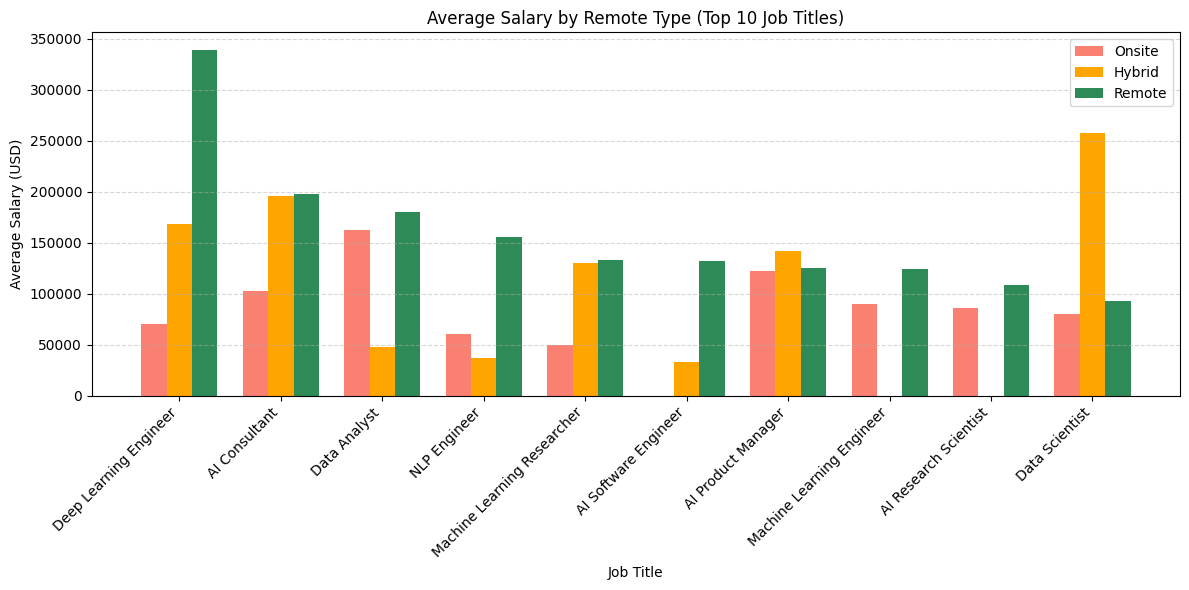

In [29]:
# Comparison of Average Salary by Work Mode (Remote, Hybrid, Onsite) for Top 10 Job Titles
top_jobs = remote_sal_df.sort_values(by='Average_Remote', ascending=False).head(10)

x = np.arange(len(top_jobs['job_title']))
width = 0.25

plt.figure(figsize=(12, 6))

plt.bar(x - width, top_jobs['Average_Onsite'], width=width, label='Onsite', color='salmon')
plt.bar(x, top_jobs['Average_Hybrid'], width=width, label='Hybrid', color='orange')
plt.bar(x + width, top_jobs['Average_Remote'], width=width, label='Remote', color='seagreen')

plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Remote Type (Top 10 Job Titles)')
plt.xticks(x, top_jobs['job_title'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [30]:
avg_salary_by_employment = available_jobs.groupby('employment_type')['salary_usd'].mean().round().reset_index()
avg_salary_by_employment

,employment_type,salary_usd
0,CT,119805.0
1,FL,131150.0
2,FT,119876.0
3,PT,107141.0


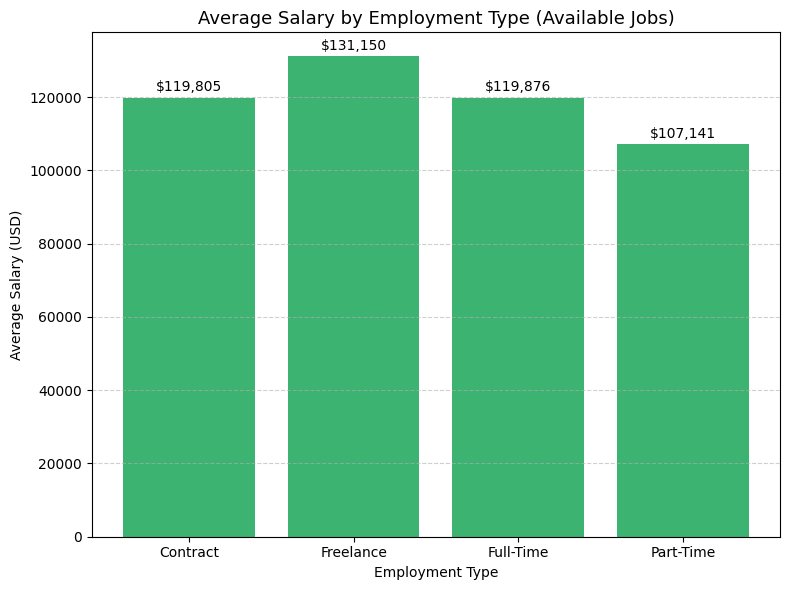

In [31]:
# Define full form labels for employment types
employment_labels = {
    'FT': 'Full-Time',
    'PT': 'Part-Time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

# Replace abbreviations with full forms
avg_salary_by_employment['employment_type'] = avg_salary_by_employment['employment_type'].map(employment_labels)

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_salary_by_employment['employment_type'], avg_salary_by_employment['salary_usd'], color='mediumseagreen')

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f"${int(yval):,}", ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Employment Type (Available Jobs)', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [32]:
# Top Job Title in Each Country Based on Number
job_counts = data.groupby(['company_location', 'job_title']).size().reset_index(name='count')

top_job_per_country = job_counts.sort_values('count', ascending=False).drop_duplicates('company_location')

top_job_per_country = top_job_per_country.sort_values('company_location').reset_index(drop=True)
top_job_per_country.head(10)

,company_location,job_title,count
0,Australia,AI Research Scientist,44
1,Austria,Data Scientist,52
2,Canada,Autonomous Systems Engineer,49
3,China,Autonomous Systems Engineer,57
4,Denmark,AI Research Scientist,57
5,Finland,Autonomous Systems Engineer,46
6,France,AI Software Engineer,47
7,Germany,Head of AI,58
8,India,Data Engineer,51
9,Ireland,Head of AI,54
